## Visualize before-after samples

This notebook can be used to visualize samples from a change detection dataset created with script *create_deforestation_detection_dataset.py*.
The following code assumes that the working directory is the root (i.e. the directory from where the notebook code is executed) is the root directory of this repo.  

**Note**: the **GOOGLE_APPLICATION_CREDENTIALS** must be set to access the bucket on GCS.


In [11]:
%load_ext autoreload
%autoreload 2

In [12]:
import ee
ee.Initialize()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# Load dataset
from data.dataset import get_dataset

file_pattern = "/home/giuliano/ai4good/deforest-training-sampling-rects/deforest-training_sampling_rectangles_1_20201001_20201031_scale-40/val/*tfrecord*"
dataset = get_dataset(file_pattern, include_mso=False, transpose=True, min_pos_ratio=0.02)
print("Dataset size: %d" % (dataset.reduce(np.int64(0), lambda x, _: x + 1)))


Dataset size: 58


In [21]:
# Extract one sample
inputs, outputs = next(iter(dataset.take(1)))

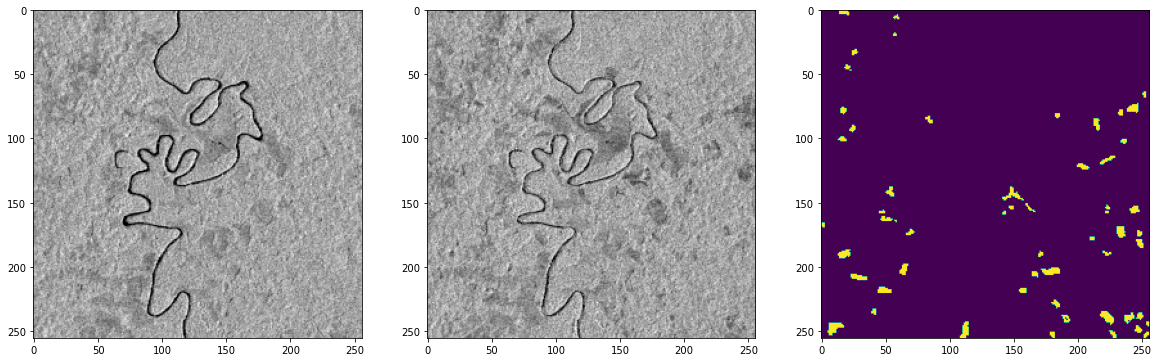

KeyboardInterrupt: Interrupted by user

In [20]:
from PIL import Image
from utils.visualization import mso_to_rgb, mask_to_grayscale, sar_to_grayscale
from IPython.display import clear_output


for inputs, outputs in dataset.as_numpy_iterator():
    clear_output(True)

    sar_before_gray = sar_to_grayscale(inputs[:, :, 0:2])
    sar_after_gray = sar_to_grayscale(inputs[:, :, 2:4])
    mso_rgb = mso_to_rgb(inputs[:, :, -3:])
    mask_gray = mask_to_grayscale(outputs)

    masked_mso_rgb = np.copy(mso_rgb)
    masked_mso_rgb[mask_gray == 255] = [255, 255, 255]


    plt.figure(figsize=(20, 10))

    plt.subplot(1, 3, 1)
    plt.imshow(sar_before_gray, cmap="gray")
    plt.subplot(1, 3, 2)
    plt.imshow(sar_after_gray, cmap="gray")
    plt.subplot(1, 3, 3)
    plt.imshow(mask_gray)

    plt.show(block=False)

    input("Press enter to continue.")